<a href="https://colab.research.google.com/github/AdithyaVijay246/GenAI-Course/blob/main/ImageGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

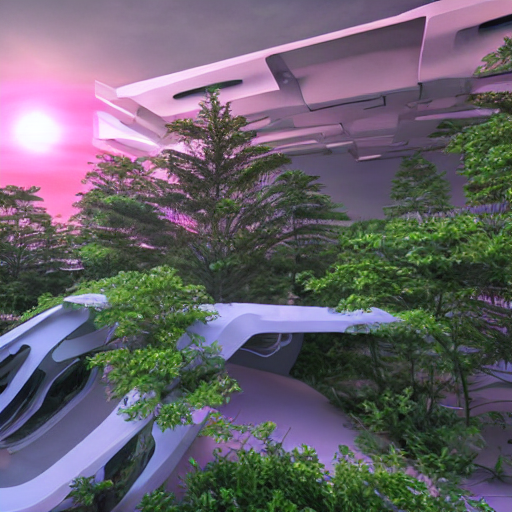

In [2]:
!pip install -U -q diffusers transformers accelerate Pillow

import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# Check if CUDA is available and set the device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load a pre-trained Stable Diffusion model from Hugging Face
# You can choose other models from https://huggingface.co/models?pipeline_tag=text-to-image
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe = pipe.to(device)

def text_to_image(prompt: str, image_name: str = "generated_image.png"):
    """
    Generates an image from a text prompt using the Stable Diffusion model.

    Args:
        prompt (str): The text description of the image to be generated.
        image_name (str, optional): The name to save the generated image as.
                                     Defaults to "generated_image.png".

    Returns:
        PIL.Image.Image: The generated image.
    """
    with torch.autocast(device):
        image = pipe(prompt).images[0]
    image.save(image_name)
    return image

# Example usage:
prompt = "A futuristic sunset with greenery"
generated_image = text_to_image(prompt, "futuristic_city.png")

# To display the image in Colab:
generated_image